Import some Python libraries for data management and plotting. Load some historic weather recodings.  


In [1]:
import pandas as pd # import Pandas library (and defining shorthand "pd") for reading and manipulating the data files
from matplotlib import pyplot as plt # import and define shorthand "plt" for library "pyplot" providing plotting functions
from IPython.display import display, HTML
import numpy as np   # import and define shorthand "np" for library "numpy" for advanced mathematical operations in python
from pymc3 import  *
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
cmpd = ['orangered','dodgerblue','springgreen']

#read in data from csv files 
#parse_dates function is used on Date-column to change them from string to date-object

data = pd.read_csv("https://raw.githubusercontent.com/alexjungaalto/PythonPlayground/master/WetterData.csv",sep='\t')
data1 = pd.read_csv("https://raw.githubusercontent.com/alexjungaalto/PythonPlayground/master/WetterDataMissing.csv",sep='\t')

## Show top rows of each file.

display(HTML(data.head(5).to_html(max_rows=5)))

features = data.mintmp.values; 
labels  = data.maxtemp.values; 

#features = data.R2.values; 
#labels = data.R4.values; 
plt.scatter(features,labels)
plt.xlabel('feature x = mintmp', fontsize=18)
plt.ylabel('label y = maxtmp', fontsize=18)

#plt.annotate('$(x^{(i)},y^{(i)})$', xy=(features[0], labels[0]), xytext=(10, 56),
#            arrowprops=dict(arrowstyle="->",facecolor='black'),
#            )

plt.tick_params(labelsize=20)
plt.scatter(features, labels,  color='blue')
plt.show()

feat = np.array([[-11, -10.5, -10,-9,-9.2,-8,-7,-6,-5,8,8.5,9,9.5,10,10.5,11,11.5]]).T  # shape (3, 1)
lab = np.array([[-10,   -10,   -10,-10,-10,-10,-10,-10,-10,4,5,6,7,8,9,10,12]]).T  # shape (3, 1)

plt.tick_params(labelsize=15)
plt.xlabel('feature x', fontsize=18)
plt.ylabel('label y', fontsize=18)
plt.scatter(feat,lab, color='blue')
X =np.column_stack((feat,lab))
y_pred = KMeans(n_clusters=2).fit_predict(X)
plt.scatter(X[:,0], X[:,1], s=20*(y_pred+1))
#print(cmpd[y_pred])
#data.dropna(inplace=True)
display(HTML(data1.head(5).to_html(max_rows=5)))

/anaconda3/lib/python3.6/site-packages/theano/configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


,Year,m,d,Time,Prec,snow,tmp,maxtemp,mintmp
0,2016,1,2,00:00,-1.0,-1.0,-7.0,-5.5,-7.8
1,2016,1,3,00:00,3.2,-1.0,-8.7,-7.2,-10.0
2,2016,1,4,00:00,-1.0,4.0,-11.2,-4.9,-13.5
3,2016,1,5,00:00,0.6,4.0,-17.6,-13.3,-19.6
4,2016,1,6,00:00,-1.0,4.0,-20.3,-16.4,-21.3


<Figure size 640x480 with 1 Axes>

,Year,m,d,Time,Prec,snow,tmp,maxtemp,mintmp
0,2016,1,2,00:00,-1.0,-1.0,-7.0,-5.5,-7.8
1,2016,1,3,00:00,3.2,-1.0,-8.7,-7.2,-10.0
2,2016,1,4,00:00,-1.0,4.0,-11.2,NaN,-13.5
3,2016,1,5,00:00,0.6,4.0,-17.6,-13.3,-19.6
4,2016,1,6,00:00,-1.0,4.0,-20.3,-16.4,-21.3


Read in statistics of countries from wikidata. 

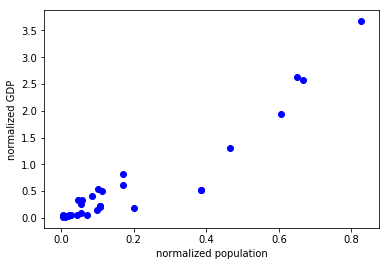

[2.58250131 0.33373076 0.13913503 1.31132002 0.49268128 0.06240446
 0.25188489 0.53804046 0.32487197 0.52450957 0.52450957 0.0471683
 1.93479794 0.41659567 0.20028828 0.21757108 0.82620028 2.62243396
 3.67743913 0.02592108 0.03026445 0.21572553 0.09576903 0.04876966
 0.1866906  0.05683152 0.05484918 0.02165179 0.01253775 0.61300326]


In [2]:

import requests
import pandas as pd
from collections import OrderedDict
import matplotlib.pyplot as plt

# E.g. read in key figures (gdp, average age, population, ...) of all countries.
# only EU countries: ?country wdt:P463 wd:Q458
#  UN countries Q1065

url = 'https://query.wikidata.org/sparql'
query = """
SELECT
  ?countryLabel ?population ?area ?medianIncome ?age ?nominalGDP
WHERE {
  ?country wdt:P463 wd:Q458
  OPTIONAL { ?country wdt:P1082 ?population }
  OPTIONAL { ?country wdt:P2046 ?area }
  OPTIONAL { ?country wdt:P3529 ?medianIncome }
  OPTIONAL { ?country wdt:P571 ?inception.
    BIND(year(now()) - year(?inception) AS ?age)
  }
  OPTIONAL { ?country wdt:P2131 ?nominalGDP}
  SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
}
"""

r = requests.get(url, params={'format': 'json', 'query': query})
data = r.json()

countries = []
for item in data['results']['bindings']:
    countries.append(OrderedDict({
        'country': item['countryLabel']['value'],
        'population': item['population']['value'],
        'area': item['area']['value']
            if 'area' in item else None,
        'medianIncome': item['medianIncome']['value']
            if 'medianIncome' in item else None,
        'age': item['age']['value']
            if 'age' in item else None,
        'nominalGDP': item['nominalGDP']['value']
            if 'nominalGDP' in item else None}))

df=pd.DataFrame(countries)
df.set_index('country', inplace=True)
df=df.astype({'population': float, 'area': float, 'medianIncome': float, 'age': float, 'nominalGDP': float})


df.fillna(df.mean(), inplace=True)
features = df.population.values/1e8
labels = df.nominalGDP.values/1e12
#print(df)
#print(labels)
plt.xlabel('normalized population')
plt.ylabel('normalized GDP')
plt.scatter(features, labels,  color='blue')
plt.show()
print(labels)

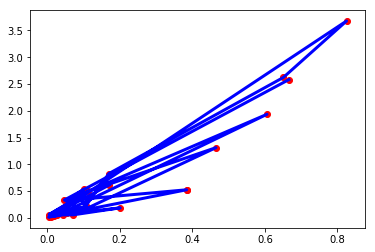

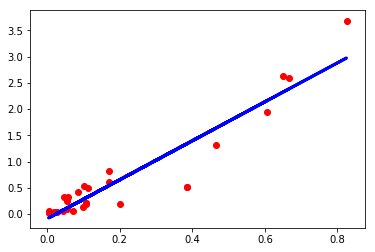

In [3]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training/testing sets
X_train = features.reshape( -1, 1) 
X_test = features.reshape( -1, 1) 

# Split the targets into training/testing sets
y_train = labels
y_test = labels

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# Split the targets into training/testing sets



X_train = features.reshape( -1, 1) 
X_test = features.reshape( -1, 1) 
y_train = labels
y_test = labels
X_train, y_train = shuffle(X_train, y_train)
X_train=X_train[:30,:]
y_train=y_train[:30]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)
X = X_train; 
Y = y_train; 
clf = DecisionTreeRegressor(max_depth=100)
clf.fit(X, Y)

X_eval = np.linspace(min(features), max(features), 100, endpoint=True)[:, np.newaxis]

y_pred_tree = clf.predict(X_eval)

#plt.subplot(1, 2, 1)
#plt.scatter(X_test, y_test,  color='black')
plt.scatter(X_train, y_train,  color='red')
plt.plot(X_test, y_pred_tree, color='blue', linewidth=3)

#plt.subplot(1, 2, 2)
plt.figure()
#plt.scatter(X_test, y_test,  color='black')
plt.scatter(X_train, y_train,  color='red')
plt.plot(X_test, y_pred, color='blue', linewidth=3)



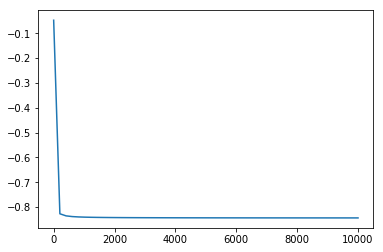

In [5]:
# search for an optimal value of K for KNN
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import numpy as np  


d_range = np.linspace(0, 10000, num=50)
d_scores = []

X = features.reshape( -1, 1) 
y = labels

#X=X[:100,:]
#y=y[:100]

for d in d_range:
    poly = make_pipeline(PolynomialFeatures(4), Ridge(alpha=d))
    scores = cross_val_score(poly, X, y, cv=10, scoring='neg_mean_squared_error')
    d_scores.append(scores.mean())
    
plt.plot(d_range, d_scores)

#print(d_scores)

Illustrate overfitting in polynomial regression. 

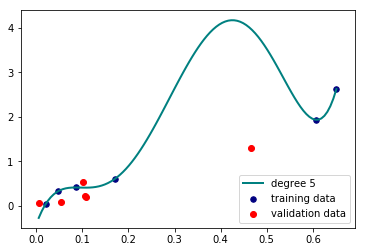

<Figure size 2880x720 with 0 Axes>

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


x = labels
y = features

X_train = features.reshape( -1, 1) 
X_test = features.reshape( -1, 1) 
y_train = labels
y_test = labels

samplesize=6

X, y = shuffle(X_train, y_train)
X=X[0:(2*samplesize):1,:]
y=y[0:(2*samplesize):1]
X_train=X[0:samplesize:1,:]
y_train=y[0:samplesize:1]
X_val=X[(samplesize):(2*samplesize):1,:]
y_val=y[(samplesize):(2*samplesize):1]


# create matrix versions of these arrays
X = x[:, np.newaxis]
#X_plot = x_plot[:, np.newaxis]

min_train = min(X_train) 
min_val = min(X_val)

max_train = max(X_train)
max_val = max(X_val)

X_eval = np.arange(min(min_train,min_val), max(max_train,max_val), 0.1)[:, np.newaxis]
X_eval = np.linspace(min(min_train,min_val), max(max_train,max_val), 100, endpoint=True)[:, np.newaxis]

colors = ['teal', 'yellowgreen', 'gold']
lw = 2
#plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw,
#         label="ground truth")
plt.scatter(X_train, y_train, color='navy', s=30, marker='o', label="training data")
plt.scatter(X_val, y_val,  color='red', label="validation data")
for count, degree in enumerate([5]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=0))
    model.fit(X_train, y_train)
    y_plot = model.predict(X_eval)
    plt.plot(X_eval, y_plot, color=colors[count], linewidth=lw,label="degree %d" % degree)

    
plt.legend(loc='lower right')

plt.figure(figsize=(40,10))
plt.show()
#print(X)

In [12]:
%matplotlib inline
import numpy as np
import theano.tensor as tt
import pymc3 as pm

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context('notebook')
plt.style.use('seaborn-darkgrid')
print('Running on PyMC3 v{}'.format(pm.__version__))

Running on PyMC3 v3.5


In [13]:
with pm.Model() as model:
    mu = pm.Normal('mu', mu=0, sd=1)
    obs = pm.Normal('obs', mu=mu, sd=1, observed=np.random.randn(100))

In [14]:
model.basic_RVs

[mu, obs]

In [19]:

with pm.Model() as model:
    mu = pm.Normal('y', mu=0, sd=1)
    obs = pm.Normal('x', mu=mu, sd=1, observed=np.random.randn(100))

    step = pm.Metropolis()
    trace = pm.sample(1000, step=step)

Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [y]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:04<00:00, 667.20draws/s]
The number of effective samples is smaller than 25% for some parameters.


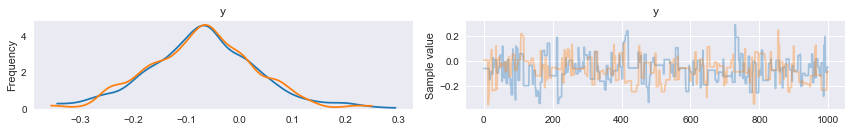

In [20]:
pm.traceplot(trace);

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import numpy
# fix random seed for reproducibility

# load pima indians dataset
#dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables

X_train = features.reshape( -1, 1) 
y_train=labels.reshape(-1,1)

X_train, y_train = shuffle(X_train, labels)
X=X_train[:30,:]
Y=y_train[:30]


# create model

#model = Sequential()
#model.add(Dense(40, input_dim=1, init='uniform', activation='relu'))
#model.add(Dense(40, init='uniform', activation='relu'))
#model.add(Dense(1, init='uniform'))

model = Sequential()
model.add(Dense(1000, input_dim=1, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
    
    
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X, Y, epochs=200, batch_size=X.shape[0] ,  verbose=0)
# calculate predictions
predictions = model.predict(X_eval)
plt.scatter(X, Y,  color='red')
plt.plot(X_eval, predictions, color='blue', linewidth=3)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def modified_huber_loss(y_true, y_pred):
    z = y_pred * y_true
    loss = -4 * z
    loss[z >= -1] = (1 - z[z >= -1]) ** 2
    loss[z >= 1.] = 0
    return loss


xmin, xmax = -4, 4
xx = np.linspace(xmin, xmax, 100)
lw = 5
plt.plot([xmin, 0, 0, xmax], [1, 1, 0, 0], color='gold', lw=lw,
         label="Zero-one loss")
plt.rcParams.update({'font.size': 22})
plt.plot(xx, np.where(xx < 1, 1 - xx, 0), color='teal', lw=lw,
         label="Hinge loss")
plt.plot(xx, -np.minimum(xx, 0), color='yellowgreen', lw=lw,
         label="Perceptron loss")
plt.plot(xx, np.log2(1 + np.exp(-xx)), color='cornflowerblue', lw=lw,
         label="Log loss")
plt.plot(xx, np.where(xx < 1, 1 - xx, 0) ** 2, color='orange', lw=lw,
         label="Squared hinge loss")
plt.plot(xx, modified_huber_loss(xx, 1), color='darkorchid', lw=lw,
         linestyle='--', label="Modified Huber loss")
plt.ylim((0, 8))
plt.legend(loc="upper right")
plt.xlabel(r"$h(x)y$")
#plt.ylabel("$L(y=1, f(x))$")
plt.show()



In [ ]:
plt.plot(xx, xx** 2, color='teal', lw=lw,
         label="Hinge loss")
plt.xlabel(r"$y - h(x)$")